# MVP Pipeline de Dados – Recursos Humanos  
## Análise de Retenção e Eficiência Organizacional  

**Vanessa Araújo**  

PUC-RJ – MBA em Ciência de Dados e Analytics  
Disciplina de Engenharia de Dados  

###Imports
Imports das bibliotecas necessárias para o funcionamento do script.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import seaborn as sns

**Carga das tabelas Gold**

In [0]:
spark = SparkSession.builder.getOrCreate()


#Turnover Metrics
turnover = spark.table("gold.turnover_metrics")
turnover.printSchema()
turnover_pd = turnover.toPandas()
turnover_pd.head()

#Absenteeism Metrics
absenteeism = spark.table("gold.absenteeism_metrics")
absenteeism.printSchema()
absenteeism_pd = absenteeism.toPandas()
absenteeism_pd.head()


# Performance Metrics
performance = spark.table("gold.performance_metrics")
performance.printSchema()
performance_pd = performance.toPandas()
performance_pd.head()


# Satisfaction Metrics

satisfaction = spark.table("gold.satisfaction_metrics")
satisfaction.printSchema()
satisfaction_pd = satisfaction.toPandas()
satisfaction_pd.head()

# Diversity Metrics
diversity = spark.table("gold.diversity_metrics")
diversity.printSchema()
diversity_pd = diversity.toPandas()
diversity_pd.head()


# Salary Metrics
salary = spark.table("gold.salary_metrics")
salary.printSchema()
salary_pd = salary.toPandas()
salary_pd.head()

root
 |-- department: string (nullable = true)
 |-- total_funcionarios: long (nullable = true)
 |-- total_desligados: long (nullable = true)
 |-- taxa_rotatividade: double (nullable = true)
 |-- tempo_medio_empresa: double (nullable = true)

root
 |-- department: string (nullable = true)
 |-- total_funcionarios: long (nullable = true)
 |-- total_ausencias: long (nullable = true)
 |-- media_ausencias_por_funcionario: double (nullable = true)
 |-- total_atrasos_ultimos_30_dias: long (nullable = true)

root
 |-- department: string (nullable = true)
 |-- performance_score: string (nullable = true)
 |-- total_funcionarios: long (nullable = true)
 |-- total_ausencias: long (nullable = true)
 |-- total_atrasos_ultimos_30_dias: long (nullable = true)

root
 |-- department: string (nullable = true)
 |-- status_funcionario: string (nullable = true)
 |-- total_funcionarios: long (nullable = true)
 |-- media_satisfacao: decimal(16,2) (nullable = true)

root
 |-- department: string (nullable = true

,department,total_funcionarios,massa_salarial_total,salario_medio,salario_minimo,salario_maximo
0,Escritório Executivo,1,1250000.0,250000.00,250000.0,250000.0
1,Venda,32,10989450.0,68684.06,55875.0,180000.0
2,Engenharia de Software,10,4807605.0,96152.10,77692.0,108987.0
3,Produção,208,62366500.0,59967.79,45046.0,170500.0
4,Escritórios administrativos,10,3647450.0,72949.00,49920.0,106367.0


**Conversão Spark → Pandas**

In [0]:
turnover_pd     = turnover_df.toPandas()
absenteeism_pd  = absenteeism_df.toPandas()
performance_pd  = performance_df.toPandas()
satisfaction_pd = satisfaction_df.toPandas()
diversity_pd    = diversity_df.toPandas()
salary_pd       = salary_df.toPandas()

**Análise 1: Fatores associados à rotatividade**

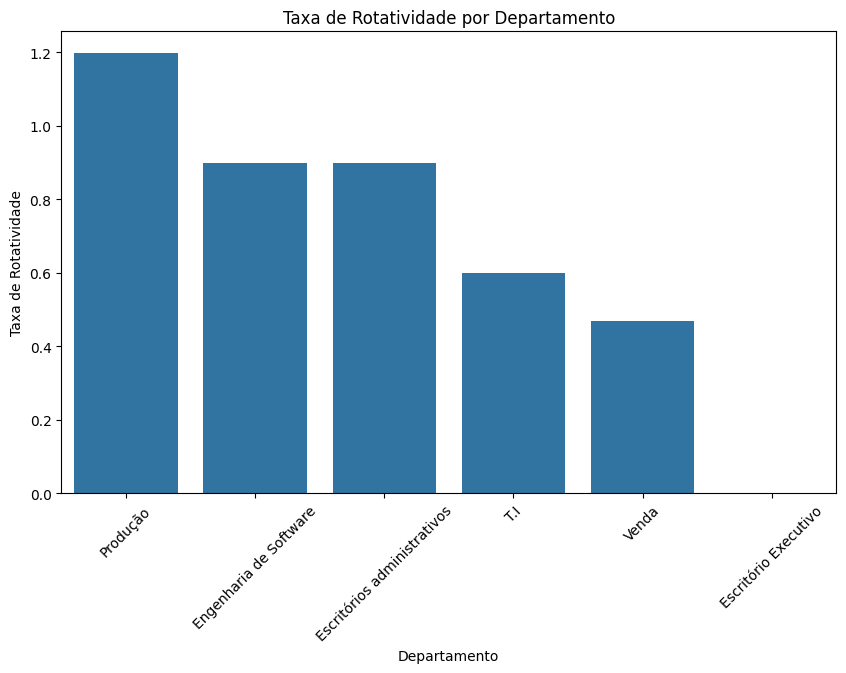

In [0]:
# Taxa de rotatividade por departamento
plt.figure(figsize=(10,6))
sns.barplot(x='department', y='taxa_rotatividade', data=turnover_pd, order=turnover_pd.sort_values('taxa_rotatividade', ascending=False)['department'])
plt.title('Taxa de Rotatividade por Departamento')
plt.ylabel('Taxa de Rotatividade')
plt.xlabel('Departamento')
plt.xticks(rotation=45)
plt.show()


**Análise 2: Absenteísmo e desempenho**

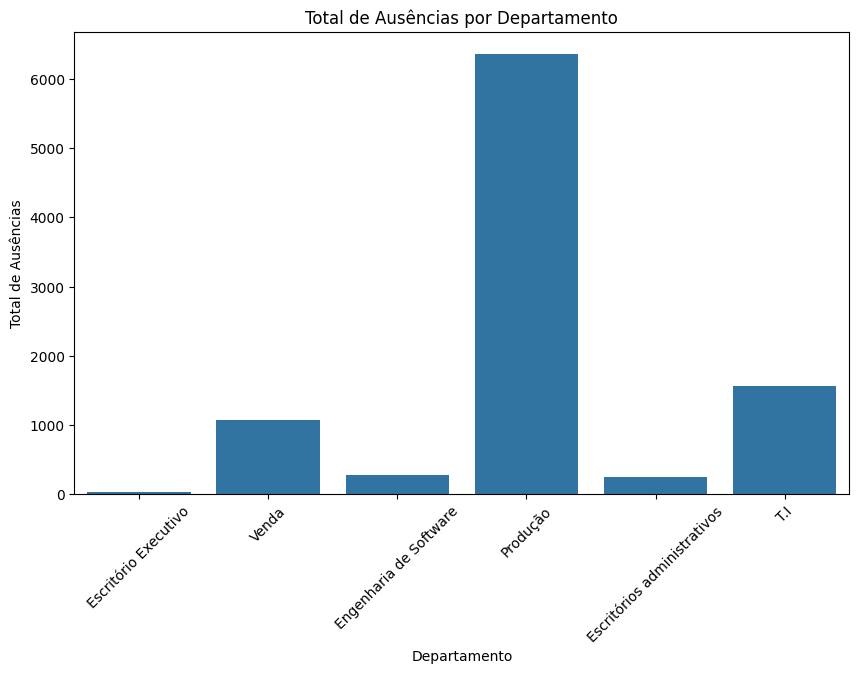

In [0]:
# Total de ausências por departamento
plt.figure(figsize=(10,6))
sns.barplot(x='department', y='total_ausencias', data=absenteeism_pd)
plt.title('Total de Ausências por Departamento')
plt.xticks(rotation=45)
plt.ylabel('Total de Ausências')
plt.xlabel('Departamento')
plt.show()


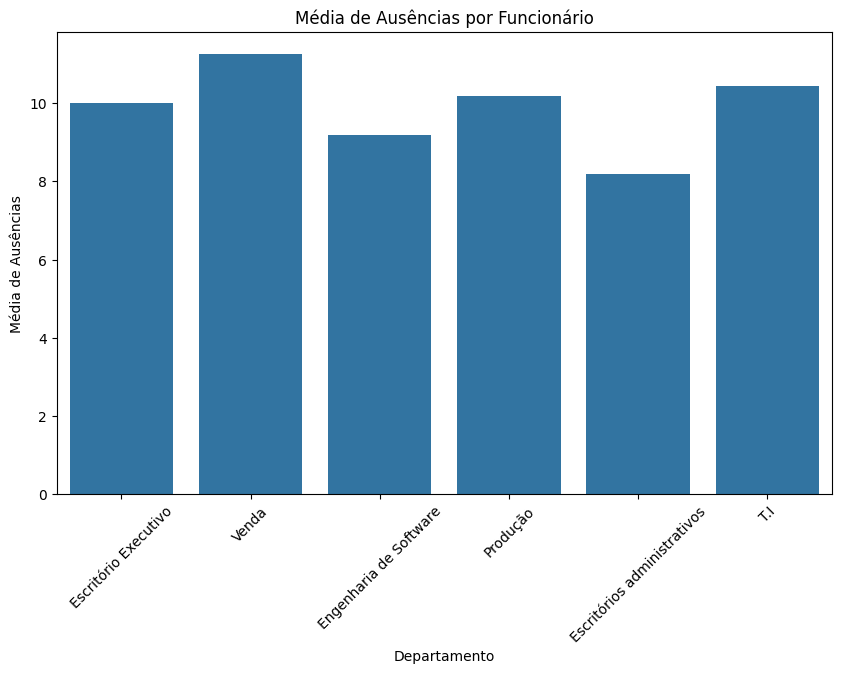

In [0]:
# Média de ausências por funcionário
plt.figure(figsize=(10,6))
sns.barplot(x='department', y='media_ausencias_por_funcionario', data=absenteeism_pd)
plt.title('Média de Ausências por Funcionário')
plt.xticks(rotation=45)
plt.ylabel('Média de Ausências')
plt.xlabel('Departamento')
plt.show()

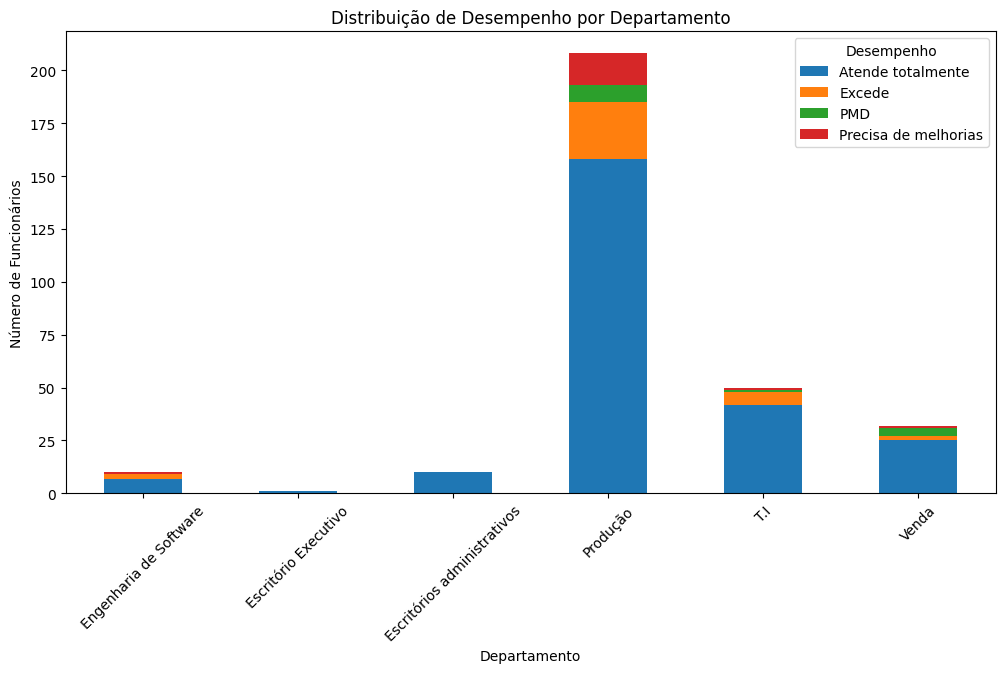

In [0]:
# Pivotar os dados para plotagem
df_pivot = performance_pd.pivot(index='department', columns='performance_score', values='total_funcionarios').fillna(0)

# Plot de barras empilhadas
df_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribuição de Desempenho por Departamento')
plt.ylabel('Número de Funcionários')
plt.xlabel('Departamento')
plt.xticks(rotation=45)
plt.legend(title='Desempenho')
plt.show()

%md
**Análise 3: Satisfação dos Funcionários**

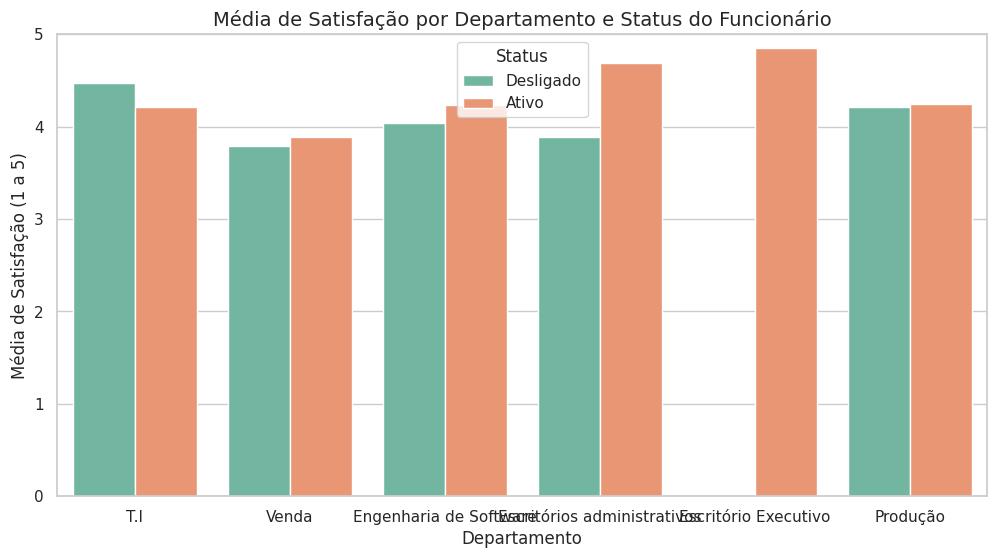

In [0]:
# Criando o dataframe com os dados corrigidos
data = {
    "department": [
        "T.I", "Venda", "Engenharia de Software", "Engenharia de Software",
        "Escritórios administrativos", "T.I", "Escritório Executivo",
        "Produção", "Produção", "Escritórios administrativos", "Venda"
    ],
    "status_funcionario": [
        "Desligado", "Ativo", "Desligado", "Ativo", "Ativo",
        "Ativo", "Ativo", "Desligado", "Ativo", "Desligado", "Desligado"
    ],
    "total_funcionarios": [10,27,3,7,7,40,1,83,125,3,5],
    "media_satisfacao": [4.47,3.89,4.04,4.23,4.69,4.21,4.85,4.21,4.25,3.89,3.79]
}

df = pd.DataFrame(data)

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras agrupado
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x="department",
    y="media_satisfacao",
    hue="status_funcionario",
    palette="Set2"
)

# Adicionando título e rótulos
plt.title("Média de Satisfação por Departamento e Status do Funcionário", fontsize=14)
plt.xlabel("Departamento", fontsize=12)
plt.ylabel("Média de Satisfação (1 a 5)", fontsize=12)
plt.ylim(0,5)  # Escala de 1 a 5
plt.legend(title="Status")

# Exibindo o gráfico
plt.show()

**Análise 4: Diversidade e impacto na retenção**

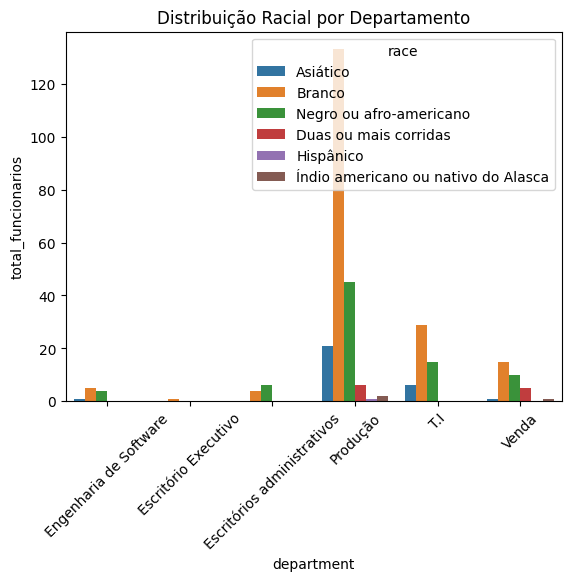

In [0]:
# Distribuição racial por departamento
df_raca = diversity_pd.groupby(['department','race'])['total_funcionarios'].sum().reset_index()
plt.figure()
sns.barplot(x='department', y='total_funcionarios', hue='race', data=df_raca)
plt.title('Distribuição Racial por Departamento')
plt.xticks(rotation=45)
plt.show()


**Análise 5: Massa Salarial**

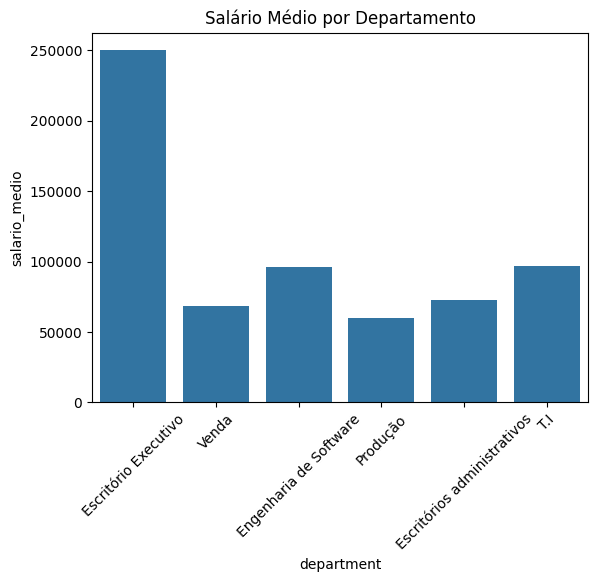

In [0]:
# Salário médio por departamento
plt.figure()
sns.barplot(x='department', y='salario_medio', data=salary_pd)
plt.title('Salário Médio por Departamento')
plt.xticks(rotation=45)
plt.show()

Satisfação